In [2]:


import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import sklearn


#pd.set_option('precision',2) # ОКРУГЛЕНИЕ до 2ух знаков после запятой

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.shape

(891, 11)

In [3]:
df.head(20)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Таким образом мы имеем в качестве количественных признаков - возраст, плата за билет(fare), количество близких родственников(sibsp)

категориальные и бинарные - выжившие, пол, имена, номер билета, откуда сели на титаник(город посадки пассажира) 

sirvived - выжил или нет
pclass - класс каюты
name - имя
sex - пол
age - возраст
sibsp - количество родных
parch - уважение 
ticket - билет
fare - сколько заплатил за билет
cabin - место каюты
embarked - откуда сел, в каком городе

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count - количество
mean - среднее
std - среднее отклонение, показывает разброс случайной величины, чем оно меньше тем лучше
(видно что возраст и цена билета имеют самый максимальный разброс из всех признаков)
min - минимальное значение
25,50, 75 - квантили, размаха

max - максимальное значение

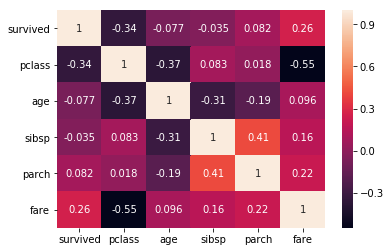

In [6]:
df_corr=df.corr()
sns.heatmap(df_corr,annot=True, vmax=1)

In [7]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [8]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

Посмотрели количество пассажиров, загруженных или посаженных в трех городах соответственно

**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

In [9]:
df_fare=df[(df['embarked'] == 'C') & (df['fare'] > 200)]
df_fare.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


In [10]:
(df['fare'] > 200).dtypes

dtype('bool')

In [11]:
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

**Можно отсортировать этих людей по убыванию платы за билет.**

In [12]:
df_fare.sort_values(by='fare',ascending=False) #ascending = false - по убыванию

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
299,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
380,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
700,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


# Создадим новый признак

In [13]:
def age_category(age):
 
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3


In [14]:
age_categories = [age_category(age) for age in df.age]

In [15]:
df['Age_category'] = age_categories

In [62]:
df.head(30)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Age_category,fare_category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,poor
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,2,rich
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,1,poor
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,2,rich
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,2,poor
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q,3,poor
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S,2,rich
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07,NaN,S,1,poor
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S,1,poor
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C,1,poor


In [17]:
def fare_category(fare):
    
    if fare < 50:
        return 'poor'
    elif fare > 50 < 200:
        return 'rich'
    else:
        return 'very_rich'

In [18]:
fare_category= [ fare_category(fare) for fare in df.fare]

In [19]:
df['fare_category']= fare_category

In [20]:
df.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Age_category,fare_category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,poor
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,rich
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,poor
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,rich
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,poor
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,3,poor
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2,rich
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,poor
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,poor
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,poor


Только что мы создали новый признак разделяющий людей на богатых и бедных по какому-то пороговому значению

 # ЗАДАНИЯ

 ## Сколько мужчин / женщин находилось на борту?

In [21]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

## Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

In [22]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [23]:
df_male=df[df['sex'] == 'male'] #Отобрали всех мужчин

In [24]:
df_male.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Age_category,fare_category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,poor
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,poor
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,3,poor
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2,rich
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,poor


In [25]:
df_male_two_class=df[(df['sex'] == 'male') & (df['pclass'] == 2)] #Отобрали всех мужчин с классом соц статуса - 2

In [26]:
df_male_two_class.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Age_category,fare_category
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S,3,poor
20,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S,2,poor
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S,2,poor
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5,NaN,S,3,poor
70,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5,NaN,S,2,poor


In [27]:
df_male_two_class.shape

(108, 13)

**108 - мужчин с социально-экономическим статусом 2**

## Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [28]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [29]:
pd.set_option('precision',2)

In [30]:
df['fare'].describe()

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: fare, dtype: float64

## Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [31]:
df_survived= df[(df['age'] <30 ) & (df['survived'] ==1)]

In [32]:
df_survived.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Age_category,fare_category
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,1,poor
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S,1,poor
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C,1,poor
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.70,G6,S,1,poor
22,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.03,NaN,Q,1,poor


Создали новую базу данных с выжившими людьми в возрасте меньше 30 лет

In [33]:
df_survived_oldman= df[(df['age'] >60 ) & (df['survived'] ==1)] 
#Точно также отделили выживших людей в возрасте больше 60 лет

In [34]:
df.groupby?

In [35]:
df_survived.mean(),  df_survived_oldman.median()

(survived         1.00
 pclass           2.17
 age             17.48
 sibsp            0.54
 parch            0.69
 fare            39.50
 Age_category     1.00
 dtype: float64, survived         1.0
 pclass           1.0
 age             63.0
 sibsp            0.0
 parch            0.0
 fare            30.0
 Age_category     3.0
 dtype: float64)

In [36]:
df[df['age'] >60 ]['survived'].value_counts(1) 

0    0.77
1    0.23
Name: survived, dtype: float64

In [37]:
df[df['age'] <30 ]['survived'].value_counts(1) 

0    0.59
1    0.41
Name: survived, dtype: float64

Видим что процент выживших людей в возрасте младше 30 лет больше чем людей в возрасте старше 60

In [38]:
df_surv=df.groupby('survived')

In [39]:
for survived,surv_df in df_surv:
    print(survived)
    print(surv_df)

0
     survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
4           0       3                           Allen, Mr. William Henry   
5           0       3                                   Moran, Mr. James   
6           0       1                            McCarthy, Mr. Timothy J   
7           0       3                     Palsson, Master. Gosta Leonard   
12          0       3                     Saundercock, Mr. William Henry   
13          0       3                        Andersson, Mr. Anders Johan   
14          0       3               Vestrom, Miss. Hulda Amanda Adolfina   
16          0       3                               Rice, Master. Eugene   
18          0       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
20          0       2                               Fynney, Mr. Joseph J   
24          0       3                      Palsson, Miss. Torborg Danira   
26        

Сгруппировали по группам выживших и не выживших

## Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [40]:
df_surv_sex=df.groupby('sex')
df_surv_sex.count()

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,Age_category,fare_category
sex,,,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312,314,314
male,577,577,577,453,577,577,577,577,107,577,577,577


In [41]:
df_surv_sex['survived'].mean()

sex
female    0.74
male      0.19
Name: survived, dtype: float64

Таким образом мы сгруппировали данные по признаку - sex(пол), а затем нашли среднее количество выживших мужчин и женщин по данному признаку

## Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [42]:
from collections import Counter

In [43]:
c=Counter(df['name'])

In [44]:
c

Counter({'Braund, Mr. Owen Harris': 1,
         'Cumings, Mrs. John Bradley (Florence Briggs Thayer)': 1,
         'Heikkinen, Miss. Laina': 1,
         'Futrelle, Mrs. Jacques Heath (Lily May Peel)': 1,
         'Allen, Mr. William Henry': 1,
         'Moran, Mr. James': 1,
         'McCarthy, Mr. Timothy J': 1,
         'Palsson, Master. Gosta Leonard': 1,
         'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)': 1,
         'Nasser, Mrs. Nicholas (Adele Achem)': 1,
         'Sandstrom, Miss. Marguerite Rut': 1,
         'Bonnell, Miss. Elizabeth': 1,
         'Saundercock, Mr. William Henry': 1,
         'Andersson, Mr. Anders Johan': 1,
         'Vestrom, Miss. Hulda Amanda Adolfina': 1,
         'Hewlett, Mrs. (Mary D Kingcome) ': 1,
         'Rice, Master. Eugene': 1,
         'Williams, Mr. Charles Eugene': 1,
         'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)': 1,
         'Masselmani, Mrs. Fatima': 1,
         'Fynney, Mr. Joseph J': 1,
         'Beesley, Mr

In [45]:
df.groupby('sex').count()

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,Age_category,fare_category
sex,,,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312,314,314
male,577,577,577,453,577,577,577,577,107,577,577,577


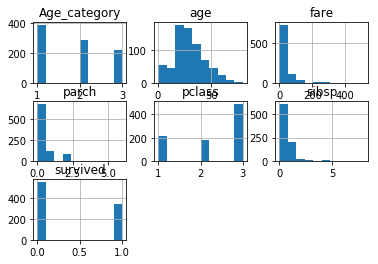

In [46]:
df.hist();

# Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

Таким образом у нас получается взаимодействие количественного признака с категориальным (бинарным)

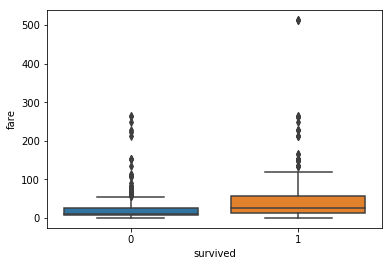

In [47]:
sns.boxplot(x='survived', y='fare', data=df);

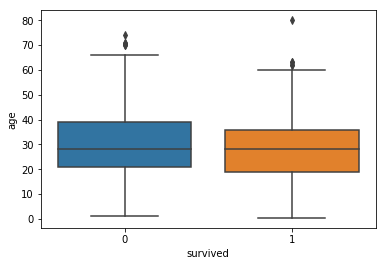

In [48]:
sns.boxplot(x='survived', y='age', data=df);

In [49]:
df.groupby('survived')['age'].mean()

survived
0    30.63
1    28.34
Name: age, dtype: float64

In [50]:
df.groupby('survived')['fare'].mean()

survived
0    22.12
1    48.40
Name: fare, dtype: float64

**ДЕЛАЕМ ВЫВОД** : Средний возраст погибших выше чем средний возраст выживших

# Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

pclass - класс обслуживания

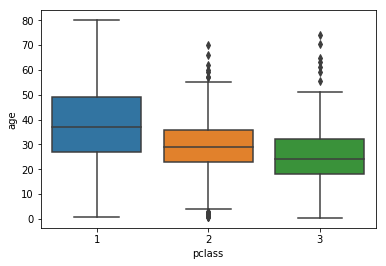

In [51]:
sns.boxplot(x= 'pclass', y='age',data=df); # По оси х - номер класса, по оси y - возраст

Чем моложе пассажир, тем больше по порядковому номеру он выбирает класс

Но в задаче сказано что нам нужен средний возраст мужчин/женщин в зависимости от номера класса

In [52]:
df.groupby?

In [53]:
df.groupby(['sex'])['age'].mean()

sex
female    27.92
male      30.73
Name: age, dtype: float64

Затем производим группировку количественного признака в зависимости от 2ух категориальных и считаем его среднее значение

In [54]:
df.groupby(['sex','pclass'])['age'].mean()

sex     pclass
female  1         34.61
        2         28.72
        3         21.75
male    1         41.28
        2         30.74
        3         26.51
Name: age, dtype: float64

Вывод:

В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

## Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [55]:
!pip install nameparser

Could not install packages due to an EnvironmentError: [Errno 13] Отказано в доступе: '/usr/local/lib/python3.6/dist-packages/nameparser'
Consider using the `--user` option or check the permissions.

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
from nameparser import HumanName

In [105]:
name = df['name']
name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [90]:
name = HumanName?

In [ ]:
name = HumanName

In [75]:
n=nam.last

In [78]:
nam=df['name']

In [114]:
split?

In [110]:
split=nam.str.split()
split.head(20)

0                          [Braund,, Mr., Owen, Harris]
1     [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                            [Heikkinen,, Miss., Laina]
3     [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                         [Allen,, Mr., William, Henry]
5                                  [Moran,, Mr., James]
6                          [McCarthy,, Mr., Timothy, J]
7                   [Palsson,, Master., Gosta, Leonard]
8     [Johnson,, Mrs., Oscar, W, (Elisabeth, Vilhelm...
9             [Nasser,, Mrs., Nicholas, (Adele, Achem)]
10                 [Sandstrom,, Miss., Marguerite, Rut]
11                         [Bonnell,, Miss., Elizabeth]
12                  [Saundercock,, Mr., William, Henry]
13                     [Andersson,, Mr., Anders, Johan]
14           [Vestrom,, Miss., Hulda, Amanda, Adolfina]
15                [Hewlett,, Mrs., (Mary, D, Kingcome)]
16                             [Rice,, Master., Eugene]
17                    [Williams,, Mr., Charles, 

In [97]:
split=df["name"][1].split()[0]

In [98]:
split

'Cumings,'